<a href="https://colab.research.google.com/github/DGonzalezPicos/IDL/blob/main/assingment2/task1_MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Learn the basics of Keras API for TensorFlow

### 1.2 MLP and CNN with TF/Keras on MNIST
Apply two reference networks on the fashion MNIST
dataset: a MLP described in detail in Ch. 10, pp. 297-307 and a CNN described in Ch. 14,1p. 447.

### Implementing MLPs with Keras from [Ageron Notebook 10](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.*ipynb*)

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [16]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255). 

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [17]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

The labels are the class IDs (represented as uint8), from 0 to 9. 

Here are the corresponding class names:

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's take a look at a sample of the images in the dataset:

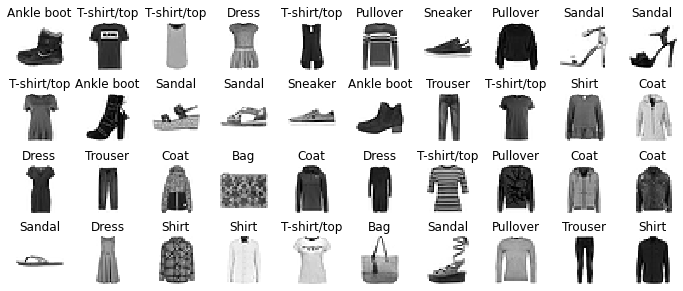

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [22]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_104 (Dense)           (None, 300)               235500    
                                                                 
 dense_105 (Dense)           (None, 100)               30100     
                                                                 
 dense_106 (Dense)           (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


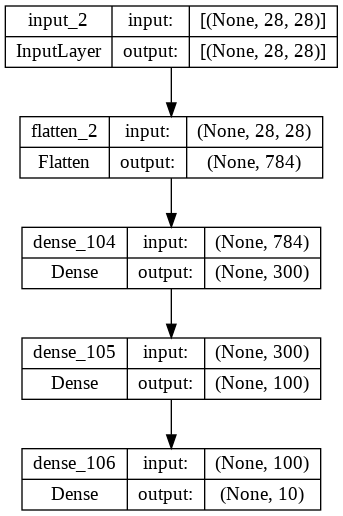

In [23]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Compiling the model


In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Training and evaluating the model


In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7221 - accuracy: 0.7647 - val_loss: 0.4961 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4826 - accuracy: 0.8332 - val_loss: 0.4563 - val_accuracy: 0.8386
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4370 - accuracy: 0.8476 - val_loss: 0.4238 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4124 - accuracy: 0.8556 - val_loss: 0.3969 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3912 - accuracy: 0.8629 - val_loss: 0.3887 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3753 - accuracy: 0.8689 - val_loss: 0.3914 - val_accuracy: 0.8610
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3630 - accuracy: 0.8712 - val_loss: 0.3715 - val_accuracy

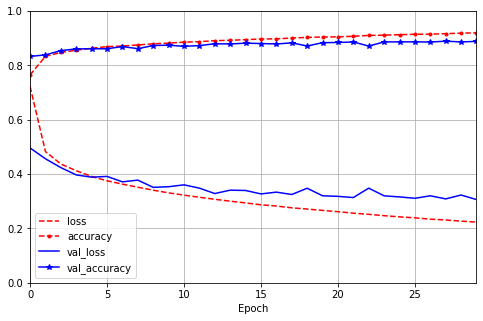

In [27]:
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.savefig("keras_learning_curves_plot.png", bbox_inches='tight', dpi=200)  # extra code
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.8845


[0.32635441422462463, 0.8845000267028809]

Using the model to make predictions


In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = y_proba.argmax(axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 56ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')